## Importing and Inspecting Dataset

First of all, we import and print the dataset.


In [ ]:
import pandas as pd

url = ("https://drive.google.com/u/1/uc?id=10v8KBkSDuSsOddhdP4KWx2b-pyGEZPro"
                                                          "&export=download")
df = pd.read_csv(url)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


Afterwards, we convert the data from categorical to numerical. For example, the Urban and Rural values ​​of the Residence_type column become 0 and 1 respectively. All mappings are shown below along with the resulting new DataFrame:

In [ ]:
mappings = []
for column in ['gender', 'ever_married', 'work_type', 
               'Residence_type', 'smoking_status']:
  mapping = { category:num for num, category in enumerate(df[column].unique()) }
  print(column)
  print(mapping)
  mappings.append(mapping)
  df.replace({column: mapping}, inplace=True)
df = df.drop(labels=['id'], axis=1)
df['age'] = df['age'].astype(int)
df

gender
{'Male': 0, 'Female': 1, 'Other': 2}
ever_married
{'Yes': 0, 'No': 1}
work_type
{'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
Residence_type
{'Urban': 0, 'Rural': 1}
smoking_status
{'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3}


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,0,0,0,228.69,36.6,0,1
1,1,61,0,0,0,1,1,202.21,NaN,1,1
2,0,80,0,1,0,0,1,105.92,32.5,1,1
3,1,49,0,0,0,0,0,171.23,34.4,2,1
4,1,79,1,0,0,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,0,0,0,83.75,NaN,1,0
5106,1,81,0,0,0,1,0,125.20,40.0,1,0
5107,1,35,0,0,0,1,1,82.99,30.6,1,0
5108,0,51,0,0,0,0,1,166.29,25.6,0,0


## Dataset Analysis and Graphic Representation

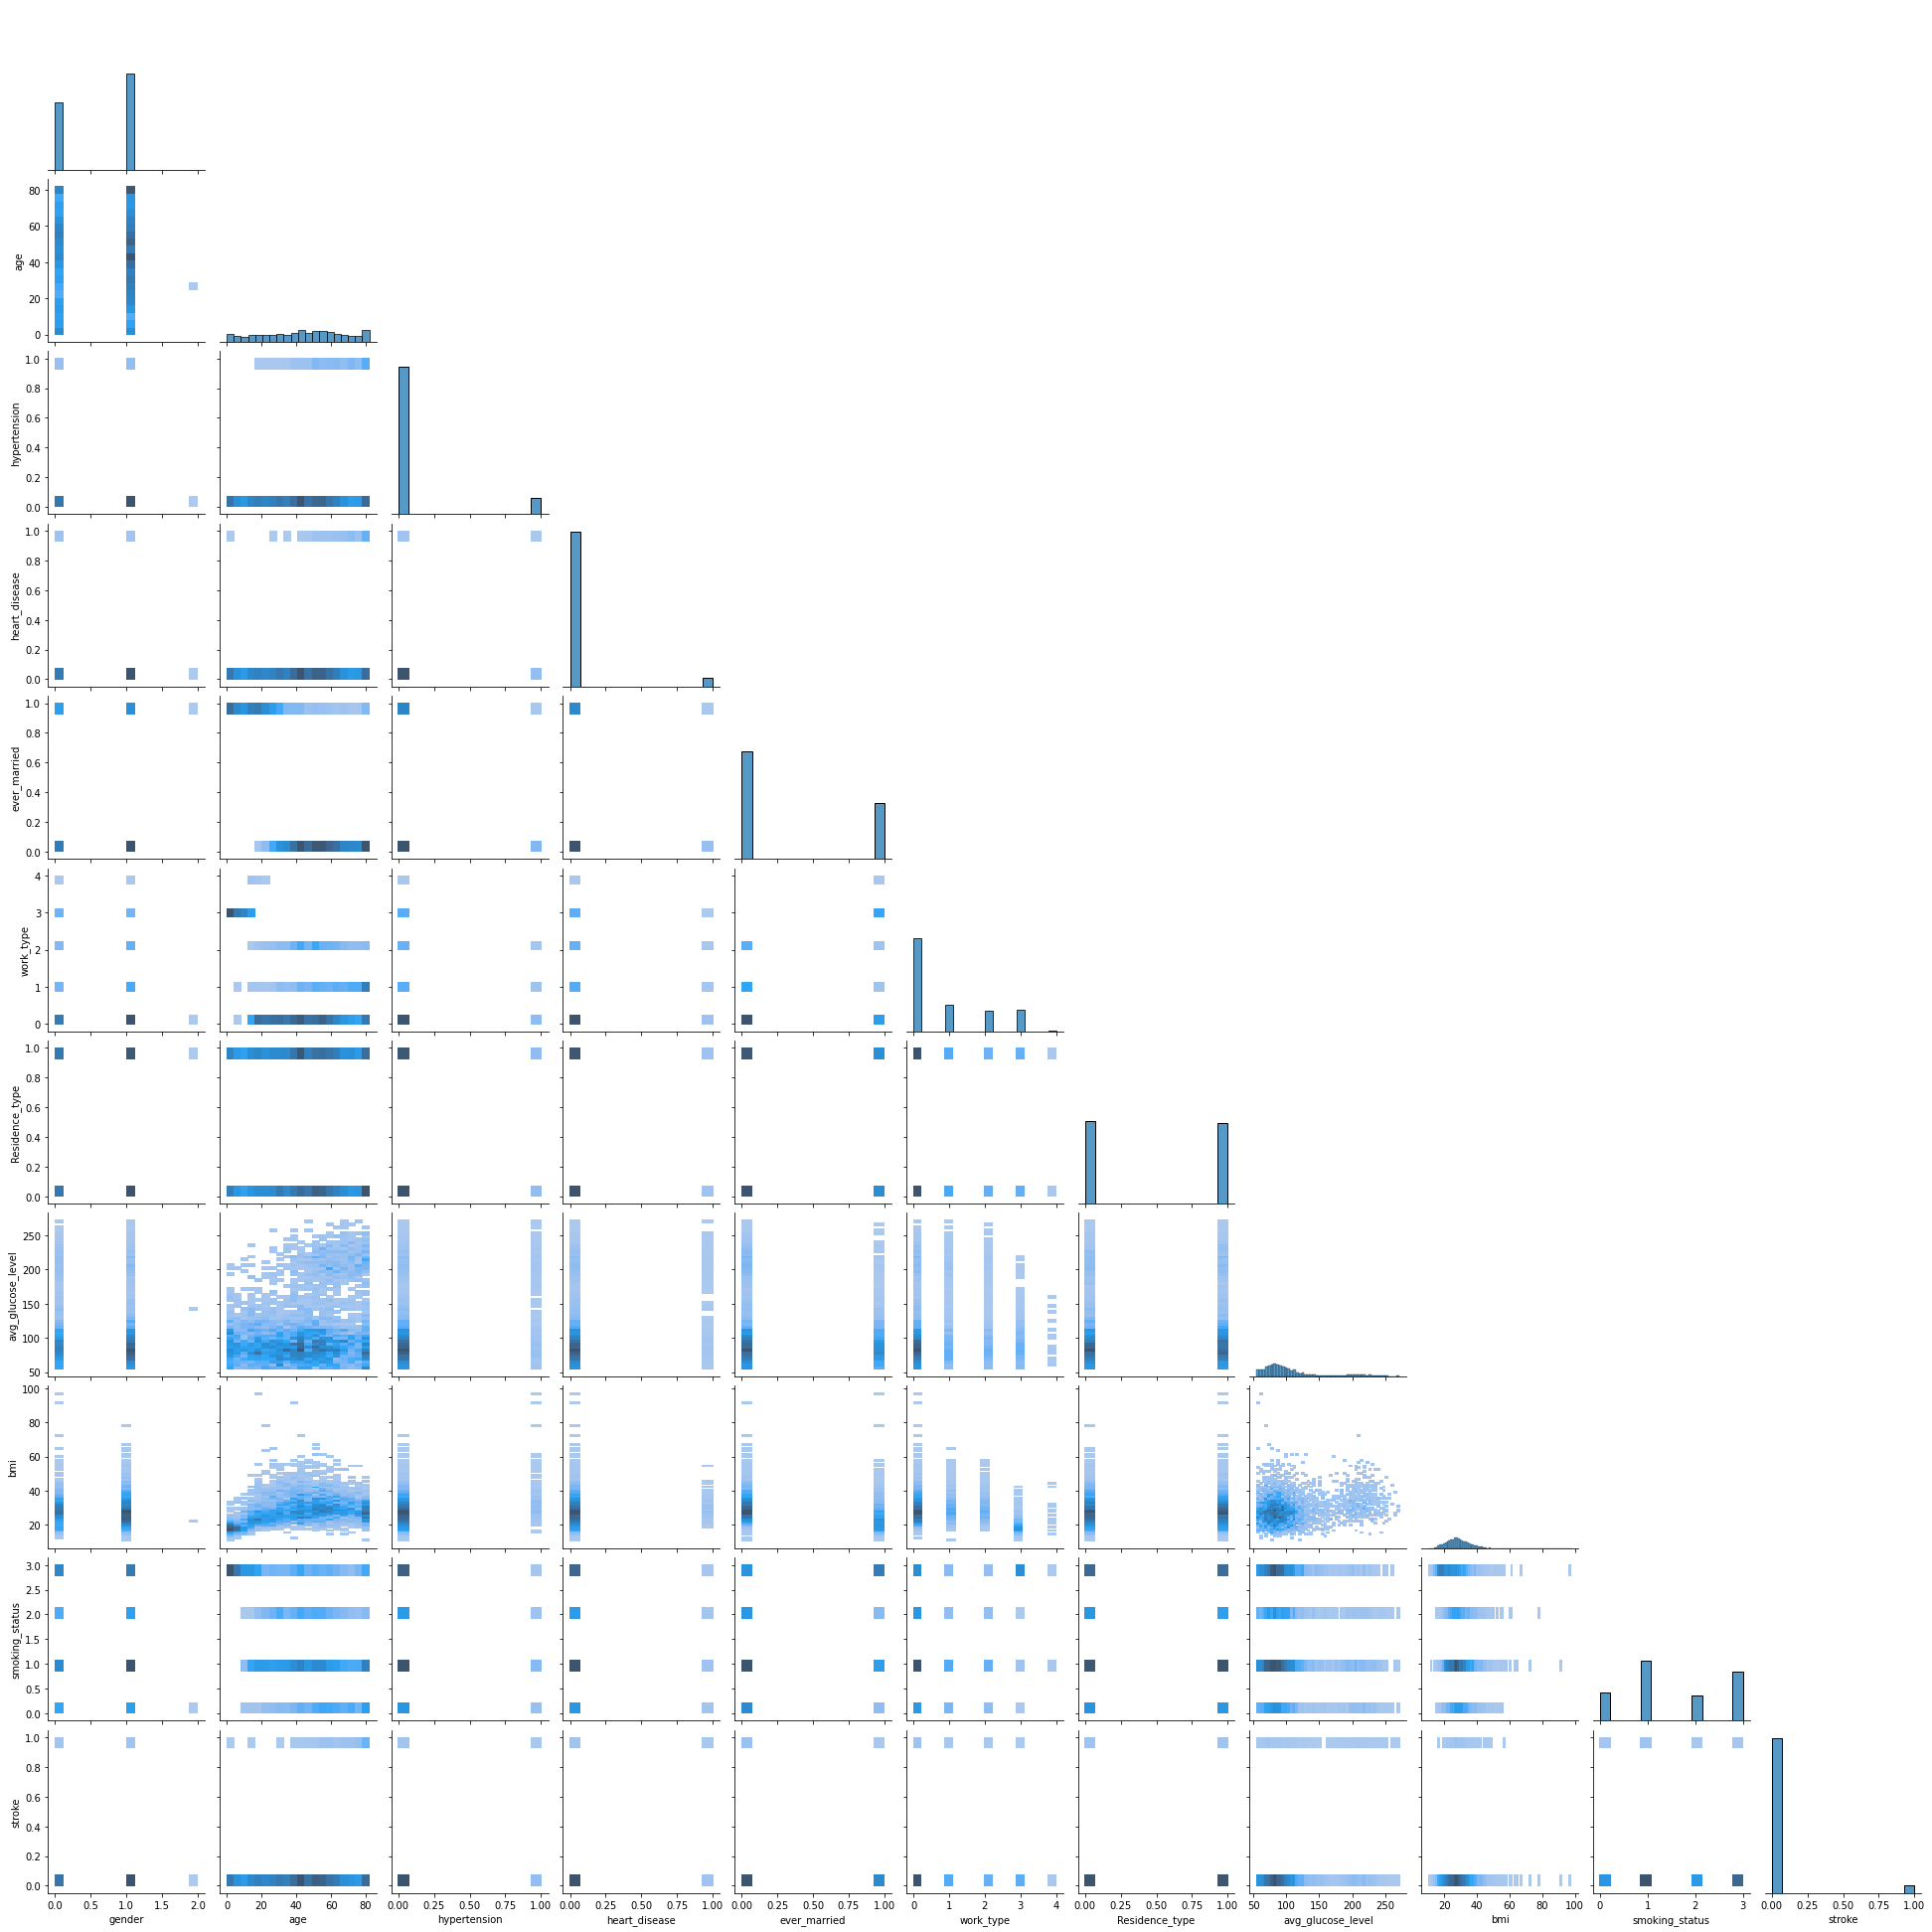

In [ ]:
import seaborn as sns

sns.pairplot(df, corner=True, kind="hist")

* In the image above a grid is created that correlates the columns of the dataset with each other. For example in the pair (age, avg_glucose_level) the correlation between age and mean glucose levels is shown.
* In the case of the diagonal, the histogram of each column is displayed. For example, the pair (avg_glucose_level, avg_glucose_level) shows the distribution of values for the average glucose column.

### Column removal

To find the missing values, we must detect columns that have a null value using the isnull () function:

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The **bmi** column contains null values. So the column is removed and the new dataframe is shown below:

In [ ]:
df_without_bmi = df.drop(labels=['bmi'], axis=1)
df_without_bmi

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,0,67,0,1,0,0,0,228.69,0,1
1,1,61,0,0,0,1,1,202.21,1,1
2,0,80,0,1,0,0,1,105.92,1,1
3,1,49,0,0,0,0,0,171.23,2,1
4,1,79,1,0,0,1,1,174.12,1,1
...,...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,0,0,0,83.75,1,0
5106,1,81,0,0,0,1,0,125.20,1,0
5107,1,35,0,0,0,1,1,82.99,1,0
5108,0,51,0,0,0,0,1,166.29,0,0


We also notice that the column **smoking_status** contains strings whose value is equal to "Unknown". So we remove the column and save the new dataframe, thus creating the second matrix shown below:

In [ ]:
df_without_smoking_status = df.drop(labels=['smoking_status'], axis=1)
df_without_smoking_status

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,0,67,0,1,0,0,0,228.69,36.6,1
1,1,61,0,0,0,1,1,202.21,NaN,1
2,0,80,0,1,0,0,1,105.92,32.5,1
3,1,49,0,0,0,0,0,171.23,34.4,1
4,1,79,1,0,0,1,1,174.12,24.0,1
...,...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,0,0,0,83.75,NaN,0
5106,1,81,0,0,0,1,0,125.20,40.0,0
5107,1,35,0,0,0,1,1,82.99,30.6,0
5108,0,51,0,0,0,0,1,166.29,25.6,0


### Filling null values using mean

The average values ​​of the dataframe columns are presented below. As expected, non-numeric columns do not have an average value and therefore cannot be filled.

In [ ]:
df.mean()

gender                 0.586301
age                   43.215264
hypertension           0.097456
heart_disease          0.054012
ever_married           0.343836
work_type              0.837965
Residence_type         0.491977
avg_glucose_level    106.147677
bmi                   28.893237
smoking_status         1.585519
stroke                 0.048728
dtype: float64

Now, we fill in the column **bmi**, which is the only numeric column containing **NaN** fields:


In [ ]:
df_bmi_with_mean_value = df.fillna(df.mean())
df_bmi_with_mean_value

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,0,0,0,228.69,36.600000,0,1
1,1,61,0,0,0,1,1,202.21,28.893237,1,1
2,0,80,0,1,0,0,1,105.92,32.500000,1,1
3,1,49,0,0,0,0,0,171.23,34.400000,2,1
4,1,79,1,0,0,1,1,174.12,24.000000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,0,0,0,83.75,28.893237,1,0
5106,1,81,0,0,0,1,0,125.20,40.000000,1,0
5107,1,35,0,0,0,1,1,82.99,30.600000,1,0
5108,0,51,0,0,0,0,1,166.29,25.600000,0,0


### Filling null values using Linear Regression

In order to fill the missing values using Linear Regression, we calculate the correlation that the bmi column has with the rest columns. This aims to find the column which is the most correlated to the bmi column. Below the correlation values are shown:


In [ ]:
df.corr(method="spearman")[['bmi']]

,bmi
gender,-0.000760
age,0.375648
hypertension,0.167493
heart_disease,0.066144
ever_married,-0.385833
work_type,-0.313364
Residence_type,-0.001139
avg_glucose_level,0.114370
bmi,1.000000
smoking_status,-0.257666


The most correlated column with bmi is **age** ans this is why we choose it for the training of the model, as shown below:


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

colx = 'age'
coly = 'bmi'

df_filtered = df[df[coly] > 0].copy()     # keep only non-null values of bmi
X_train = df_filtered[[colx]].to_numpy()
y_train = df_filtered[[coly]].to_numpy()
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print('MSE: {}'.format(mean_squared_error(y_train, y_pred)))

MSE: 54.80449441946


After training the model, null values of the bmi column are filled based on the predictions of the model:

In [ ]:
import math

def fill_nan(row):
  if math.isnan(row[coly]): # for row with nan bmi
    pred = round(model.predict([[row[colx]]])[0][0], 1) # predict missing value
    row[coly] = pred

  return row

# astype('O') preserves the same datatypes after applying the function
df_bmi_linear_regression = df.astype('O').apply(fill_nan, axis=1)
df_bmi_linear_regression

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,0,0,0,228.69,36.6,0,1
1,1,61,0,0,0,1,1,202.21,31.0,1,1
2,0,80,0,1,0,0,1,105.92,32.5,1,1
3,1,49,0,0,0,0,0,171.23,34.4,2,1
4,1,79,1,0,0,1,1,174.12,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,0,0,0,83.75,33.2,1,0
5106,1,81,0,0,0,1,0,125.20,40.0,1,0
5107,1,35,0,0,0,1,1,82.99,30.6,1,0
5108,0,51,0,0,0,0,1,166.29,25.6,0,0


### Filling null values using K-Nearest Neighbors (KNN)

The sklearn [KNNImputer] function (https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) is used to find the missing bmi column values using KNN. For this purpose the ten nearest neighbors are taken into account and the metric nan_euclidean is used (variant of the Euclidean distance to ignore null values).

For example for the following two vectors **nan_euclidean_distance** are:

$
v1 = [3, nan, nan, 6]\\
v2 = [1, nan, 4, 5]\\
distance = \sqrt{\frac{4}{2}((3-1)^2+(6-5)^2)}
$


---

Using the above metric, the **KNNImputer** function with a number of neighbors equal to two, runs as follows for the $X$ matrix:

$X = [[1, 2, nan], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]$

For the vector $[1, 2, nan]$, its two nearest neighbors are the vectors $[3, 4, 3], [nan, 6, 5]$. For this reason the nan value of the original vector becomes equal to the average, ie $ \ frac {3 + 5. {2} $. So the resulting matrix is:


$X = [[1, 2, 4], [3, 4, 3], [nan, 6, 5], [8, 8, 7]]$

A similar procedure is followed for the second vector with a null value and the result is shown below:


$X = [[1, 2, 4], [3, 4, 3], [5.5, 6, 5], [8, 8, 7]]$


In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

X = df.to_numpy()
imputer = KNNImputer(n_neighbors=10, metric='nan_euclidean')
arr = imputer.fit_transform(X)
df_bmi_knn = pd.DataFrame(arr, index=df.index, columns=df.columns)

int_cols = ['gender',	'age', 'hypertension', 'heart_disease', 'ever_married',
            'work_type', 'Residence_type', 'smoking_status', 'stroke']
df_bmi_knn[int_cols] = df_bmi_knn[int_cols].astype('int')
df_bmi_knn

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,0,0,0,228.69,36.60,0,1
1,1,61,0,0,0,1,1,202.21,33.11,1,1
2,0,80,0,1,0,0,1,105.92,32.50,1,1
3,1,49,0,0,0,0,0,171.23,34.40,2,1
4,1,79,1,0,0,1,1,174.12,24.00,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80,1,0,0,0,0,83.75,27.08,1,0
5106,1,81,0,0,0,1,0,125.20,40.00,1,0
5107,1,35,0,0,0,1,1,82.99,30.60,1,0
5108,0,51,0,0,0,0,1,166.29,25.60,0,0


## Random Forest

Random Forest is used to predict whether or not a patient is prone to stroke.

**The process in detail:**

*   For each matrix, the dataset is divided into training and test set with a ratio of 75% -25% respectively
*   SMOTE balanced the minority class (stroke = 1) for the train set. Thus for the training data a transformed version is created
*   The performance of the model is then measured using the metric f1 score, precision and recall



DF Name: df_without_bmi
	Recall: 0.03643345531587057
	Precision: 0.1874875124875125
	f1-score: 0.06077735997158806
----------------------------------------
DF Name: df_without_smoking_status
	Recall: 0.06489196012853302
	Precision: 0.17001050420168068
	f1-score: 0.09198091109956438
----------------------------------------
DF Name: df_bmi_with_mean_value
	Recall: 0.020201194926940405
	Precision: 0.09491294524189262
	f1-score: 0.0329987191620203
----------------------------------------
DF Name: df_bmi_linear_regression
	Recall: 0.023586413586413585
	Precision: 0.12462121212121212
	f1-score: 0.03949737520722048
----------------------------------------
DF Name: df_bmi_knn
	Recall: 0.012068078979843685
	Precision: 0.06176900584795321
	f1-score: 0.019966569760702546
----------------------------------------


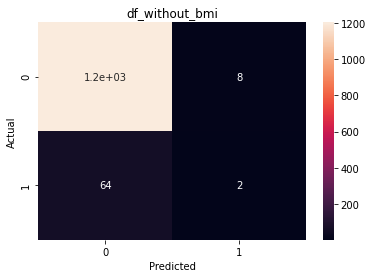

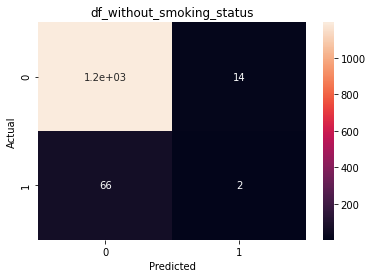

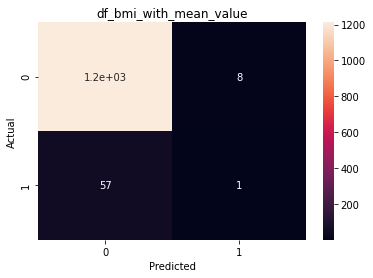

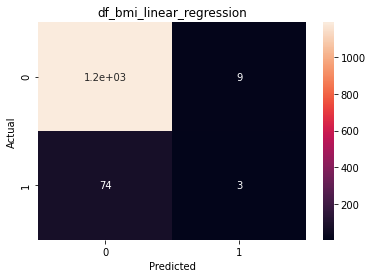

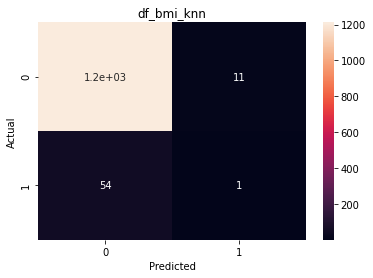

<Figure size 432x288 with 0 Axes>

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sn


dfs = {
  'df_without_bmi': df_without_bmi,
  'df_without_smoking_status': df_without_smoking_status.drop(labels=['bmi'], axis=1),
  'df_bmi_with_mean_value': df_bmi_with_mean_value,
  'df_bmi_linear_regression': df_bmi_linear_regression,
  'df_bmi_knn': df_bmi_knn,
}


for name, my_df in dfs.items():
  X = my_df[my_df.columns[:-1]] # exclude stroke
  y = my_df['stroke']

  kf = KFold(n_splits=4, shuffle=True)

  recalls = []
  precisions = []
  f1s = []
  for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X.iloc[train_index]
    y_train = y.iloc[train_index]
    X_test = X.iloc[test_index]
    y_test = y.iloc[test_index]
    sm = SMOTE()
    X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train_oversampled, y_train_oversampled)
    y_pred = model.predict(X_test)

    recalls.append(recall_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

    if fold == 0: # print only for the first fold
      confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'],
                                     colnames=['Predicted'])
      sn.heatmap(confusion_matrix, annot=True).set_title(name)
      plt.figure()

  print('DF Name: {}'.format(name))
  print(f'\tRecall: {np.mean(recalls)}')
  print(f'\tPrecision: {np.mean(precisions)}')
  print(f'\tf1-score: {np.mean(f1s)}')
  print('----------------------------------------')


Finally, we try to improve our results by experimenting with the input parameters. For this purpose we use GridSearch with various combinations of parameters.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


dfs = {
  'df_without_bmi': df_without_bmi,
  'df_without_smoking_status': df_without_smoking_status.drop(labels=['bmi'], axis=1),
  'df_bmi_with_mean_value': df_bmi_with_mean_value,
  'df_bmi_linear_regression': df_bmi_linear_regression,
  'df_bmi_knn': df_bmi_knn,
}


for name, my_df in dfs.items():
  X = my_df[my_df.columns[:-1]] # exclude stroke
  y = my_df['stroke']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

  sm = SMOTE()
  X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)

  # Hyperparameter Tuning
  model_params = {
      'n_estimators': [50, 150, 250],
      'max_features': ['sqrt', 0.5, 1.0],
      'min_samples_split': [2, 4, 6]
  }

  # create random forest classifier model
  rf_model = RandomForestClassifier(random_state=1)

  # set up grid search meta-estimator
  clf = GridSearchCV(rf_model, model_params, cv=5)
  
  # train the grid search meta-estimator to find the best model
  model = clf.fit(X_train_oversampled, y_train_oversampled)

  # print winning set of hyperparameters
  print(model.best_estimator_.get_params())
  y_pred = model.predict(X_test)


  print('DF Name: {}'.format(name))
  print(f'\tRecall: {recall_score(y_test, y_pred)}')
  print(f'\tPrecision: {precision_score(y_test, y_pred)}')
  print(f'\tf1-score: {f1_score(y_test, y_pred)}')
  print('----------------------------------------')


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 250, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
DF Name: df_without_bmi
	Recall: 0.013333333333333334
	Precision: 0.1111111111111111
	f1-score: 0.023809523809523808
----------------------------------------
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
DF Nam

As we observe from the above results, even after an exhaustive search of the optimal parameters there is no substantial improvement in the metrics. This indicates that the use of the Random Forest Classifier is not appropriate for this dataset.